# UNN

## Machine learning lab

Этот набор данных для Pokemon-ов, который включает в себя:
1. Name: Название каждого покемона
2. Type 1: у каждого покемона есть тип, который определяет бессилие / сопротивление атакам
3. Type 2: некоторые покемоны имеют двойной тип
4. базовую статистику:

    a) Total: сумма всех статистических данных, которые появляются после этого, общее руководство о том, насколько сильным является покемон
    
    b) HP: очки здоровья или здоровье, определяет, сколько урона может покемон преодолеть до обморока
    
    c) Attack: базовый модификатор для обычных атак (например, Scratch, Punch)
    
    d) Defense: сопротивление базовому урону от обычных атак
    
    e) SP Atk: специальная атака, базовый модификатор для специальных атак (например, огонь, пузырь)
    
    f) SP Def: сопротивление базового урона от специальных атак
    
    g) Speed: скорость атаки
    
    
5. так же для кажого покемона указано:

    a) поколение (generation)
    
    b) легендарность (legendary)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
import csv as cs
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
%matplotlib inline

### Загрузка данных

In [2]:
dataInfoOrig = pd.read_csv('pokemon.csv', sep = ',', engine = 'python')
dataInfo     = pd.read_csv('pokemon.csv', sep = ',', engine = 'python')
type(dataInfoOrig)

pandas.core.frame.DataFrame

In [3]:
dataInfo

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


### Анализ данных

In [4]:
print(dataInfo.shape)

(800, 12)


таблица содержит 800 строк (объектов) и 12 столбцов (признаков), выведенных ниже, включая выходной (целевой) признак.

In [5]:
cols = list(dataInfo.columns.values)
print(cols)

['Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary']


Для получения представления об имеющихся данных выведем первые несколько строк:

In [6]:
dataInfo.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
dataInfo = dataInfo.drop("Name", axis = 1)
dataInfo.head()

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
dataInfo.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Корреляция признаков:

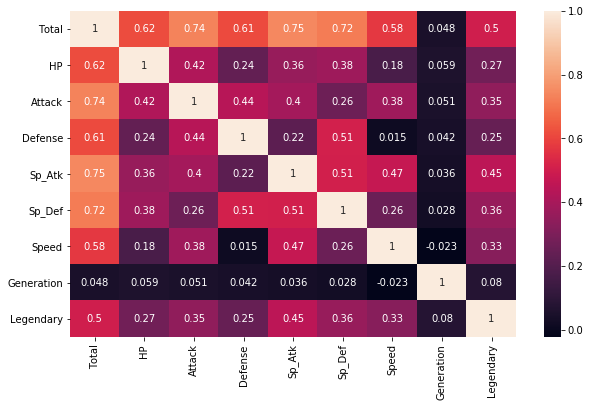

In [9]:
plt.figure(figsize=(10,6))
sbn.heatmap(dataInfo.corr(),annot=True) 
plt.show()

In [10]:
dataInfo.corr()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp_Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp_Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


Зависимость скорости атаки от типа покемона:

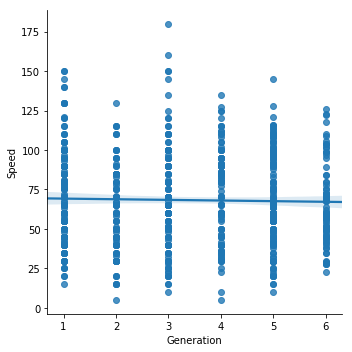

In [11]:
sbn.lmplot(x="Generation", y="Speed", data=dataInfo)

Из этого видим, что зависимости между поколением и скоростью атаки у покемонов нет.

Зависимость сопротивления против специальних атак от сопротивления:

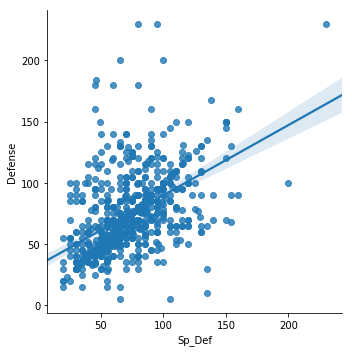

In [12]:
sbn.lmplot(x="Sp_Def", y="Defense", data=dataInfo)

Количество покемонов по их типам

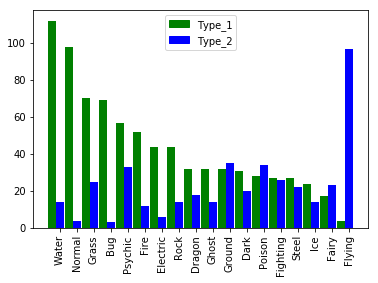

In [13]:
vals1 = [dataInfo['Type_1'].value_counts()[key] for key in dataInfo['Type_1'].value_counts().index]
vals2 = [dataInfo['Type_2'].value_counts()[key] for key in dataInfo['Type_1'].value_counts().index]
inds = np.arange(len(dataInfo['Type_1'].value_counts().index))
width = .45
handles = [ptc.Patch(color='g', label='Type_1'), ptc.Patch(color='b', label='Type_2')]
plt.bar(inds, vals1, width, color='g')
plt.bar(inds+width, vals2, width, color='b')
plt.gca().set_xticklabels(dataInfo['Type_1'].value_counts().index)
plt.gca().set_xticks(inds+width)
plt.xticks(rotation=90)
plt.legend(handles=handles)
pass

Total для легендарных покемонов по отдельным типам:

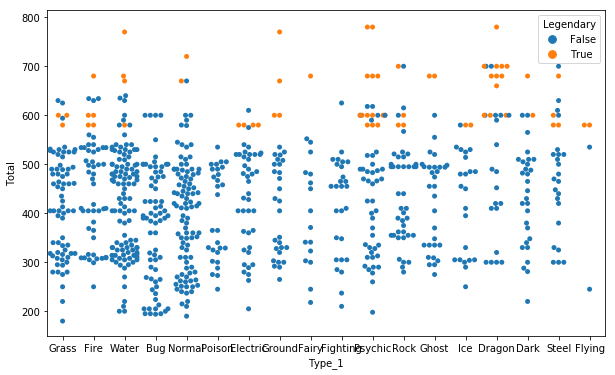

In [14]:
plt.figure(figsize=(10,6))
top_types=dataInfo['Type_1'].value_counts()[:10] 
df1=dataInfo[dataInfo['Type_1'].isin(top_types.index)]
sbn.swarmplot(x='Type_1',y='Total',data=dataInfo, hue='Legendary')
plt.show()

### Перед нами будет стоять задача по определению легендарности покемона на основе его характиристик.

#### Подготовка данных

Алгоритмы машинного обучения из библиотеки scikit-learn не работают напрямую с категориальными признаками и данными, в которых имеются пропущенные значения. Поэтому вначале подготовим наши данные.

In [15]:
dataInfo.count(axis=0)

Type_1        800
Type_2        414
Total         800
HP            800
Attack        800
Defense       800
Sp_Atk        800
Sp_Def        800
Speed         800
Generation    800
Legendary     800
dtype: int64

Можно увидеть, что почти для половины покемонов не указан второй признак.

In [16]:
dataInfo[dataInfo.Type_2.isnull()].head()

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
4,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Fire,NaN,405,58,64,58,80,65,80,1,False
9,Water,NaN,314,44,48,65,50,64,43,1,False
10,Water,NaN,405,59,63,80,65,80,58,1,False
11,Water,NaN,530,79,83,100,85,105,78,1,False


In [17]:
dataInfo['Type_1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [18]:
dataInfo['Type_2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

Type_2 является категориальным признаком, есть два варианта, как поступить с незаполнеными значениями: заполнение пропущенных значений самым популярным в столбце или удалить этот столбец.

In [19]:
dataInfo['Type_2'].describe()

count        414
unique        18
top       Flying
freq          97
Name: Type_2, dtype: object

Самый частый встречающийся Type_2 - это "Летающий", однако добавлять покемонам у которых нет второго типа такую способность будет неверным шагом, поэтому было решено удалить эту колонку для дальнейших вычислений.

In [20]:
dataInfo = dataInfo.drop('Type_2', axis=1)

А так же уберем сумму всех статистических данных:

In [21]:
dataInfo = dataInfo.drop('Total', axis=1)

In [22]:
dataInfo.describe()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#### Категориальные и числовые признаки:

In [23]:
categorical_columns = [c for c in dataInfo.columns if dataInfo[c].dtype.name == 'object']
numerical_columns   = [c for c in dataInfo.columns if dataInfo[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['Type_1']
['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary']


#### Небинарные признаки

Применим метод векторизации

In [24]:
data_nonbinary = dataInfo['Type_1'].astype('category').cat.codes
y = np.array([1 if it == True else 0 for it in dataInfo['Legendary']])
data = dataInfo.drop('Legendary', axis=1)

In [25]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['Type_1']
['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation']


#### Нормализация количественных признаков

In [26]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [27]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00
25%,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01
50%,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01
75%,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00
max,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00


In [28]:
data = data_numerical
data['Type'] = data_nonbinary
print(data.shape)
print (data.columns)

(800, 8)
Index(['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation',
       'Type'],
      dtype='object')


In [29]:
data.describe()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Type
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,800.000000
mean,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15,9.467500
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.580356
min,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00,0.000000
25%,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01,5.000000
50%,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01,10.000000
75%,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00,14.000000
max,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00,17.000000


In [30]:
Z = data
names = Z.columns
print(names)

Index(['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation',
       'Type'],
      dtype='object')


In [31]:
print(Z.shape)
N, d = Z.shape

(800, 8)


#### Обучающая и тестовая выборки

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

560 240


In [33]:
tt_errors = pd.DataFrame(columns=['model', 'train_errors', 'test_errors'])

### KNN – метод ближайших соседей

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [35]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.06607142857142857
Error test: 0.09166666666666666


#### Побор параметров

In [36]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.044642857142857095 1


#### Запуск kNN

In [37]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.09583333333333334


# ДЗ №2

In [38]:
from sklearn.datasets import load_digits
digits = load_digits()

## Будем предсказывать легендарность покемона, использую нейронную сеть.

Х — все столбцы, за исключением Legendary.

Y — легендароность покемона (Legendary).

In [39]:
X = data
y = dataInfo['Legendary']

In [40]:
print(X.shape)
print(y.shape)

(800, 8)
(800,)


Разобьем выборку на тренировочную и тестовую.

Процент тестовой выборки: 30 %

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
N_test, _ = X_test.shape
N_train, _ = X_train.shape 

print(N_train, N_test)

560 240


### Обучение классификатора

In [42]:
from sklearn.neural_network import MLPClassifier

Данная нейронная сеть будет иметь 1 скрытый слой (добавим скрытый слой с 150 нейронами)

In [43]:
mlp_model = MLPClassifier(hidden_layer_sizes = (150), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=150, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [44]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Ошибка на обучающей выборке:

In [45]:
print(np.mean(y_train != y_train_pred))

0.0


Ошибка на тестовой выборке:

In [46]:
print(np.mean(y_test != y_test_pred))

0.05416666666666667


Добавим еще один слой с 150 нейронами:

In [47]:
mlp_model = MLPClassifier(hidden_layer_sizes = (150,150), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 150), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [48]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Ошибка на обучающей выборке:

In [49]:
print(np.mean(y_train != y_train_pred))

0.0


Ошибка на тестовой выборке:

In [50]:
print(np.mean(y_test != y_test_pred))

0.04583333333333333


Заметим, что ошибка на обучающей выборке в нейронной сети (с 1 и 2 скрытыми слоями) меньше, чем на тестовой. Отсюда можно сделать вывод, что имеет место переобучение.

При использовании нейронной сети с двумя скрытыми слоями ошибка меньше, чем у нейронной сети с одним скрытым слоем. Будем использовать двуслойную нейронную сеть.

### Подбор гиперпараметров

Будем искать оптимальное значение параметра регуляризации *alpha*, используя нейронную сеть с 2 скрытыми слоями с 150 нейронами

In [51]:
alpha_arr = np.logspace(-1, 1, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (150,150), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Построим график зависимости ошибок от *alpha*

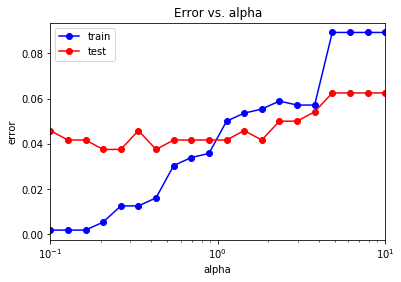

In [52]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Наблюдаем переобучение при значении *alpha < 1.75* (ошибка на тестовой выборке больше, чем на обучающей)

In [53]:
print(alpha_arr)

[ 0.1         0.1274275   0.16237767  0.20691381  0.26366509  0.33598183
  0.42813324  0.54555948  0.6951928   0.88586679  1.12883789  1.43844989
  1.83298071  2.33572147  2.97635144  3.79269019  4.83293024  6.15848211
  7.8475997  10.        ]


Найдем минимальное значение ошибки:

In [54]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0017857142857142857 0.0375


Найдем оптимальное значение *alpha*:

In [55]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.20691381 0.26366509 0.42813324]


### Классификатор при оптимальном значении *alpha*

In [56]:

mlp_model = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (150,150),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.005357142857142857
0.0375


При оптимальном значение *aplha* ошибка на тестовой выборке уменьшается по сравнению с *alpha*, взятым по умолчанию

### Оптимальное количество нейронов

Будем использовать найденное значение оптимального *alpha* для нейронной сети с 2 скрытыми слоями.

In [57]:
neuron_arr = (50, 100, 150, 200, 250, 300, 350, 400)
test_err = []
train_err = []
for neuron in neuron_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (neuron,neuron), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Строим график зависимости количества нейронов в скрытом слое от *alpha* (используем оптимальное значение *alpha*)

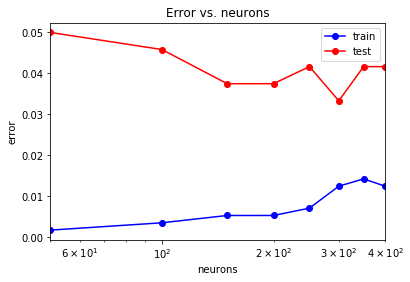

In [58]:
plt.semilogx(neuron_arr, train_err, 'b-o', label = 'train')
plt.semilogx(neuron_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Error vs. neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()
pass

Найдем минимальное значение ошибки:

In [59]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0017857142857142857 0.03333333333333333


Наблюдаем, что наименьшая ошибка получается при 300 нейронов

### Классификатор при оптимальном значении *alpha* и количестве нейронов

In [60]:
mlp_model = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (300,300),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0125
0.03333333333333333


### Матрица рассогласования:

In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[219   2]
 [  6  13]]


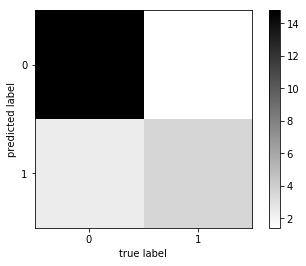

In [62]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

### Другие метрики качества

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

      False       0.99      0.97      0.98       225
       True       0.68      0.87      0.76        15

avg / total       0.97      0.97      0.97       240



#### Все ошибки

In [64]:
count = 0
for i in X_test.index:
    x = X_test.loc[i, :]
    dig = y_test[i]
    dig_pred = mlp_model.predict([x])
    if dig_pred != dig:
        count += 1
print("Количество ошибок: "+ str(count))
print("Размер тестовой выборки: " + str(len(X_test)))

Количество ошибок: 8
Размер тестовой выборки: 240


# ДЗ №3

Задача: провести классификацию покемонов на предмет легендарности

## Random Forest

Решаем поставленную задачу с помощью Random Forest

Проведем разбиение данных на обучающую и тестовую выборки:

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
N_test, _ = X_test.shape
N_train, _ = X_train.shape 

print(N_train, N_test)

560 240


Обучим классификатор вида Random Forest. Число деревьев = 100

In [66]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.0625



Ошибка на обучающей выборке меньше, чем на тестовой, следовательно имеет место переобучение.

Построим график зависимости ошибок (ошибка на обучающей выборке + ошибка на тестовой выборке + oob-ошибка) от количества деревьев

In [68]:
trees_arr = np.arange(50, 155, 5)
test_err = []
train_err = []
oob_err = []
for trees in trees_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = trees, oob_score=True)
    rf.fit(X_train, y_train)
    train_err.append(np.mean(y_train != rf.predict(X_train)))
    test_err.append(np.mean(y_test  != rf.predict(X_test)))
    oob_err.append(1 - rf.oob_score_)

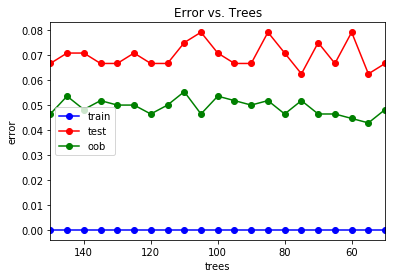

In [69]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. Trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [70]:
print(trees_arr)

[ 50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125 130 135
 140 145 150]


При любом количестве деревьев (на всем экспериментальном множестве: 50-150 деревьев) имеет место переобучение. Из графика видно, что наименьшие ошибки на обучающей и тестовой выборке наблюдаем при количестве деревьев = 50, 70. При этих значениях минимум obb-ошибки достигается при количестве деревьев = 50.

Минимальное значение ошибки:

In [71]:

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0625


Оптимальное количество деревьев

In [72]:
trees_opt = trees_arr[test_err == min_test_err]
print(trees_opt)

[55 75]


In [73]:
trees_opt = trees_opt[0]

## Extremely Random Forest

Решаем поставленную задачу с помощью Extremely Random Forest.

Проведем разбиение данных на обучающую и тестовую выборки:

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
N_test, _ = X_test.shape
N_train, _ = X_train.shape 

print(N_train, N_test)

560 240


Обучим классификатор вида Extremely Random Forest:

In [75]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100)
ert.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Ошибки на обучающей и тестовой выборках:

In [76]:
y_train_pred = ert.predict(X_train)
y_test_pred = ert.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.075


Ошибка на обучающей выборке меньше, чем на тестовой, следовательно имеет место переобучение.

Построим график зависимости ошибок (ошибка на обучающей выборке + ошибка на тестовой выборке + oob-ошибка) от количества деревьев

In [77]:
trees_arr = np.arange(50, 155, 5)
test_err = []
train_err = []
oob_err = []
for trees in trees_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators = trees, oob_score=True, bootstrap=True)
    ert.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_train)))
    test_err.append(np.mean(y_test  != ert.predict(X_test)))
    oob_err.append(1 - ert.oob_score_)

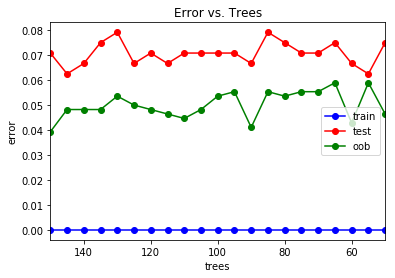

In [78]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. Trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [79]:
print(trees_arr)

[ 50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125 130 135
 140 145 150]


При любом количестве деревьев (на всем экспериментальном множестве: 50-150 деревьев) имеет место переобучение. Из графика видно, что при количестве деревьев = 55, 145 ошибка на тестовой выборке достигает своего минимума. При этих значениях минимум obb-ошибки достигается при количестве деревьев = 55.

Минимальное значение ошибки:

In [82]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0625


Оптимальное количество деревьев:

In [83]:
trees_opt = trees_arr[test_err == min_test_err]
print(trees_opt)

[ 55 145]


In [84]:
trees_opt = trees_opt[0]
print(trees_opt)

55


## AdaBoost

Решаем поставленную задачу с помощью AdaBoost

Проведем разбиение данных на обучающую и тестовую выборки:

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
N_test, _ = X_test.shape
N_train, _ = X_train.shape 

print(N_train, N_test)

560 240


Обучим классификатор вида AdaBoost

In [86]:
ab = ensemble.AdaBoostClassifier(n_estimators = 100)
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

Ошибки на обучающей и тестовой выборках:

In [87]:
y_train_pred = ab.predict(X_train)
y_test_pred = ab.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.075


Ошибка на обучающей выборке меньше, чем на тестовой, следовательно имеет место переобучение.

Построим график зависимости ошибок (ошибка на обучающей выборке + ошибка на тестовой выборке) от количества деревьев

In [88]:
trees_arr = np.arange(50, 155, 5)
test_err = []
train_err = []
for trees in trees_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators = trees)
    ab.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ab.predict(X_train)))
    test_err.append(np.mean(y_test  != ab.predict(X_test)))

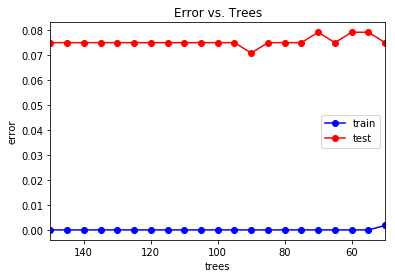

In [89]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. Trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [90]:
print(trees_arr)

[ 50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125 130 135
 140 145 150]


При любом количестве деревьев (на всем экспериментальном множестве: 50-150 деревьев) имеет место переобучение. Из графика видно, что при количестве деревьев = 90 ошибка на тестовой выборке достигает своего минимума.

Минимальное значение ошибки:

In [91]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.07083333333333333


Оптимальное количество деревьев:

In [92]:
trees_opt = trees_arr[test_err == min_test_err]
print(trees_opt)

[90]


In [93]:
trees_opt = trees_opt[0]
print(trees_opt)

90


Оптимальное количество деревьев = 90

## Gradient boosted trees

Решаем поставленную задачу с помощью Gradient boosted trees

Проведем разбиение данных на обучающую и тестовую выборки:

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
N_test, _ = X_test.shape
N_train, _ = X_train.shape 

print(N_train, N_test)

560 240


Обучим классификатор вида Gradient boosted trees

In [95]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [96]:
y_train_pred = gbt.predict(X_train)
y_test_pred = gbt.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.07083333333333333


Ошибка на обучающей выборке меньше, чем на тестовой, следовательно имеет место переобучение.

Построим график зависимости ошибок (ошибка на обучающей выборке + ошибка на тестовой выборке) от количества деревьев

In [97]:
trees_arr = np.arange(50, 155, 5)
test_err = []
train_err = []
for trees in trees_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = trees)
    gbt.fit(X_train, y_train)
    train_err.append(np.mean(y_train != gbt.predict(X_train)))
    test_err.append(np.mean(y_test  != gbt.predict(X_test)))

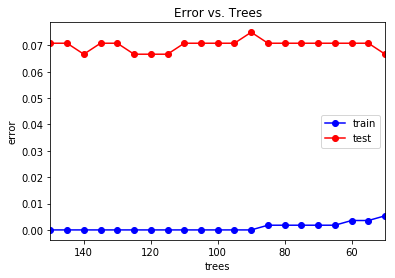

In [98]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. Trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [99]:
print(trees_arr)

[ 50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125 130 135
 140 145 150]


При любом количестве деревьев (на всем экспериментальном множестве: 50-150 деревьев) имеет место переобучение. Из графика видно, что при количестве деревьев = 50, 115, 120, 125, 140 ошибка на тестовой выборке достигает своего минимума.

Минимальное значение ошибки: 

In [104]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.06666666666666667


In [105]:
trees_opt = trees_arr[test_err == min_test_err]
print(trees_opt)

[ 50 115 120 125 140]


In [106]:
trees_opt = trees_opt[0]
print(trees_opt)

50


Оптимальное количество деревьев = 65

# ДЗ №4

## PCA - Principal Components Analysis

Задача - определить легендарность покемона на основе его характеристик.

Исходные данные до использования PCA:

In [107]:
X.shape

(800, 8)

Обучаем PCA. Исходные данные содержат 8 столбцов. Уменьшим размерность до 4

In [109]:
from sklearn import decomposition 
pca = decomposition.PCA(n_components = 4)
X_train_reduc = pca.fit_transform(X_train)
X_test_reduc = pca.transform(X_test)

Обучаем классификатор вида Extremely Randomized Trees. Число деревьев = 100

In [110]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100)
ert.fit(X_train_reduc, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [111]:
err_train = np.mean(y_train != ert.predict(X_train_reduc))
err_test  = np.mean(y_test  != ert.predict(X_test_reduc))


print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.0
Error test: 0.07083333333333333


Имеет место переобучение (ошибка на обучающей выборке меньше, чем на тестовой). Тестовая ошибка составляет 0.07083333333333333

Построим график зависимости ошибок (ошибка на обучающей выборке + ошибка на тестовой выборке) от количества компонент в методе

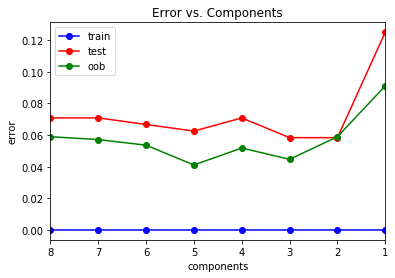

In [115]:
components_arr = np.arange(1, 9, 1)
test_err = []
train_err = []
oob_err = []
for components in components_arr:
    pca = PCA(n_components = components)
    X_pca_train = pca.fit_transform(X_train)
    X_pca_test = pca.transform(X_test)
    ert = ensemble.ExtraTreesClassifier(n_estimators = 100, oob_score=True, bootstrap=True)
    ert.fit(X_pca_train, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_pca_train)))
    test_err.append(np.mean(y_test  != ert.predict(X_pca_test)))
    oob_err.append(1 - ert.oob_score_)
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.plot(components_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(components_arr), np.min(components_arr)])
plt.title('Error vs. Components')
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
pass

In [116]:
print(components_arr)

[1 2 3 4 5 6 7 8]


Из графика видно, что при числе компонент < 2 ошибка сильно увеличивается, однако минимум тестовой ошибки достигается при числе компонент = 2. Величина OOB-ошибки также увеличивается при уменьшении числа компонент.

Минимальное значение ошибки: 

In [117]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print ('Min error train:', min_train_err)
print ('Min error test:', min_test_err)

Min error train: 0.0
Min error test: 0.058333333333333334


Оптимальное количество компонент:

In [118]:
components_opt = components_arr[test_err == min_test_err]
components_opt = components_opt[0]
print(components_opt)

2
